# Linear Algebra

The `scipy` is the core package for scientific routines in Python; it is meant to operate efficiently on numpy arrays, so that numpy and `scipy` work hand in hand. The <mark>`scipy.linalg` module provides standard linear algebra operations, relying on an underlying efficient implementation (BLAS, LAPACK).</mark>

Before implementing a routine, it is worth checking if the desired algorithm is not already implemented in `scipy`. As non-professional programmers, scientists often tend to re-invent the wheel, which leads to buggy, non-optimal, difficult-to-share and unmaintainable code. By contrast, `scipy`'s routines are optimized and tested, and should therefore be used when possible.

In this noteboook, we will review a few examples and applications. Sometimes numpy implements those methods too: if a given algorithm is present both in numpy and scipy, typically the latter is more performant.

In [1]:
import numpy as np
from scipy import linalg as la
from matplotlib import pyplot as plt

## Matrix operations

Remember that <mark>two vectors may have two very different products:</mark>
 - The <mark>[inner product](https://numpy.org/doc/stable/reference/generated/numpy.inner.html)</mark>, expressed as $v^T w$ (with $v$ and $w$ that are column vectors), is the product of a $1 \times n$ vector with an $n \times 1$ vector, and the result of the inner product is a **scalar**.
 - The <mark>[outer product](https://numpy.org/doc/stable/reference/generated/numpy.outer.html)</mark> of two vectors is given by:
$$
v\otimes w = vw^T
$$
and the <mark>result of the outer product is a **matrix**.</mark>

In [2]:
# norm of a vector
v = np.array([1, 2])
print("Norm:", la.norm(v))

# distance between two vectors
w = np.array([1, 1])
print("Distance:", la.norm(v - w))

# inner product
print("Dot prod:", v.dot(w))

# inner product
print("Inner prod:", np.inner(v, w)) # with 1D arrays, np.dot and np.inner are equivalent

# outer product
print("Outer prod:\n", np.outer(v, w))

Norm: 2.23606797749979
Distance: 1.0
Dot prod: 3
Inner prod: 3
Outer prod:
 [[1 1]
 [2 2]]


Of course, `scipy` also offers optimized methods to calculate the <mark>trace of a matrix</mark> (the sum of the diagonal elements in a square matrix):

In [3]:
M = np.random.randint(100, size=(6, 6))
print(M, '\n')
print("Trace:\n", M.trace(), '\n')

[[ 2 53 88 80 86 74]
 [70 20  4 93 51 77]
 [59 72 26 61 31 77]
 [57 57 51 90 64 99]
 [59 31 78 69 36 23]
 [14 80 36 84  7 29]] 

Trace:
 203 



... and the <mark>determinant</mark>:

In [4]:
print("Determinant:\n", la.det(M), '\n')

Determinant:
 25460552324.99999 



#### Example: calculate the covariance matrix with the outer product

As a first practical example for matrix operations, we want to <mark>calculate the covariance matrix from a given data set.</mark> Suppose we have <mark>$p$ variables (columns) and $n$ measurements (rows).</mark> The <mark>dataset would be a matrix $V$, which is therefore a $n \times p$ matrix.</mark> <mark>If all the variables (columns) have zero mean, the covariance matrix can be evaluated as:</mark>

$$C = \frac{V V^T}{p-1}$$

This is a multiplication of a $n \times p$ matrix ($V$), and a $p \times n$ matrix ($V^T$), which <mark>results in a $n \times n$ matrix.</mark>

In [5]:
# generate 4 sequences of 10 random numbers (flat between 0 and 1)
n, p = 4, 10
v = np.random.random((n, p))
print(v) # 10 x 4 matrix

[[0.12905967 0.53866885 0.77845731 0.40926636 0.54415823 0.90402455
  0.75779017 0.05374098 0.29788094 0.21998276]
 [0.42351422 0.32315254 0.85644093 0.44649687 0.14333698 0.18445373
  0.113394   0.5342073  0.94123083 0.84865086]
 [0.73828571 0.819197   0.23223051 0.23785476 0.64449572 0.76313495
  0.59166422 0.47374631 0.51305557 0.56752545]
 [0.53087072 0.06251349 0.27748433 0.72718598 0.85793678 0.99110877
  0.85721874 0.52659729 0.86180505 0.08053589]]


In [6]:
# compute the mean of each sequence (row) and set the right shape (from 1x4 to 4x1)
v_mean = v.mean(axis=1)[:, np.newaxis]
print("Mean for each row:\n", v_mean, '\n')

# re-center each sequence (row) around its mean
w = v - v_mean
print("Centered matrix:\n", w, '\n')

# compute the covariance matrix
cov = w.dot(w.T) / (p - 1)
print("Covariance matrix:\n", cov, '\n')

np_cov = np.cov(v)
# The covariance matrix can be calculated directly from numpy
print("Covariance matrix with numpy:\n", np_cov, '\n')

print("Are they the same?", np.allclose(cov, np_cov))

Mean for each row:
 [[0.46330298]
 [0.48148782]
 [0.55811902]
 [0.5773257 ]] 

Centered matrix:
 [[-0.33424331  0.07536587  0.31515433 -0.05403662  0.08085525  0.44072157
   0.29448718 -0.409562   -0.16542204 -0.24332023]
 [-0.05797361 -0.15833529  0.37495311 -0.03499096 -0.33815085 -0.29703409
  -0.36809382  0.05271948  0.459743    0.36716303]
 [ 0.18016669  0.26107798 -0.32588851 -0.32026426  0.0863767   0.20501593
   0.0335452  -0.08437271 -0.04506345  0.00940642]
 [-0.04645498 -0.51481222 -0.29984138  0.14986028  0.28061108  0.41378306
   0.27989304 -0.05072841  0.28447934 -0.49678981]] 

Covariance matrix:
 [[ 0.0846052  -0.03623646  0.00233298  0.02846744]
 [-0.03623646  0.09525169 -0.03188158 -0.04539749]
 [ 0.00233298 -0.03188158  0.04102777  0.00135457]
 [ 0.02846744 -0.04539749  0.00135457  0.11535042]] 

Covariance matrix with numpy:
 [[ 0.0846052  -0.03623646  0.00233298  0.02846744]
 [-0.03623646  0.09525169 -0.03188158 -0.04539749]
 [ 0.00233298 -0.03188158  0.04102777  0

## Linear systems

In several cases, some computational problems can be reduced to <mark>solving linear systems.</mark>
If you are dealing with a problem that can be expressed with a linear systems of the type:

$$A x = b$$

`scipy` <mark>provides a `solve()` [method](https://docs.scipy.org/doc/scipy/reference/reference/generated/scipy.linalg.solve.html#scipy.linalg.solve)</mark> for solving it.

Still, knowing a little bit what are the algorithms underneath comes handy sometimes, e.g. the solve method can be <mark>instructed about what kind of matrix $A$ is likely to be (symmetric, hermitian, positive definite, etc.)</mark>

In [7]:
A = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])
b = np.array([2, 4, -1])
x = la.solve(A, b)
print("x:", x, '\n')
print("Is Ax == b?", np.dot(A, x) == b)

x: [ 2. -2.  9.] 

Is Ax == b? [ True  True  True]


In [8]:
n = 100
A = np.random.randn(n, n)
b = np.random.randn(n)
x = la.solve(A, b)
print("x:", x)

x: [ 32.46088767 -22.57262918   1.70040484  12.12831677 -23.95817839
 -28.5773979   23.05240397   7.09104568  25.51659177  17.08405013
 -20.49383708  -1.24907998 -20.26106414  -3.31278928  14.6441207
  -8.88419372 -15.47330901  -8.04605146   5.20851699 -29.2988168
   2.83369546 -13.13950286  13.81990487 -10.9424759    2.48790399
  39.31236833   8.9439559  -34.93909222   0.14363395 -12.40935527
  17.08583144  15.0859284   17.94568082  34.71583351   7.83310652
 -17.82881238   8.97738586 -16.31201848 -32.88941492   6.96907601
 -22.91555209  -3.87757844  12.45642998 -21.91059561  -6.45827672
  26.82379072  16.23132486  -1.17537921  16.73523412   6.76853268
  16.78941404   1.13931824 -14.2255514   25.35964367  -3.73190919
   0.57689335 -16.49225413  18.38708065   2.45650558  -6.47362246
 -12.87736017 -36.6816856   -5.92804233 -12.4389258   20.61924214
  14.51107061   5.68114935  20.12031529  -7.93088418  -6.26190921
 -29.7048804  -13.47529248  -6.17374477  -1.91535626  12.19815963
  27.0074

## Matrix Decomposition

Unfortunately, <mark>if the amount of input data is large, solving linear systems by inverting the matrix can quickly become unpractical from the computational point of view.</mark>

An example is the [Netflix Competition](https://en.wikipedia.org/wiki/Netflix_Prize), where a matrix of $400000 \times 18000$ (ratings times movies) needed to be dealt with.

In these cases, the problem should be tackled by <mark>operating some convenient transformation of the input matrix.</mark>

In the mathematical discipline of linear algebra, a <mark>**matrix decomposition** or matrix factorization is a factorization of a matrix into a product of matrices.</mark> Matrix decompositions are an important step in solving linear systems in a computationally efficient manner.

### <mark>Lower-Upper factorization</mark>

Let <mark>$A$ be a *square matrix*. An LU factorization refers to the factorization of $A$, with a proper row and/or column orderings or permutations, into two factors: a lower triangular matrix $L$ and an upper triangular matrix $U$:</mark>

$A=LU$

when solving a system of linear equations, $Ax=b=LUx$, the <mark>solution is done in two logical steps:</mark>

1. solve $Ly=b$ for $y$.
2. solve $Ux=y$ for $x$.

<mark>Often a permutation $P$ is needed (*partial pivoting*) to best reorder the rows of the original matrix.</mark>

The `scipy.linalg` <mark>method `lu()` performs the [LU decomposition](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.lu.html):</mark>

In [10]:
A = np.array([[1, 3, 4], [2, 1, 3], [4, 1, 2]])
print("A:\n", A, "\n")

P, L, U = la.lu(A)
# P is the permutation matrix of the original matrix A
print("P:\n", P, '\n')
print("L:\n", L, '\n')
print("U:\n", U, '\n')
print("LU:\n", np.dot(L, U), '\n')
print("A:\n", np.dot(P.T, A), '\n')

A:
 [[1 3 4]
 [2 1 3]
 [4 1 2]] 

P:
 [[0. 1. 0.]
 [0. 0. 1.]
 [1. 0. 0.]] 

L:
 [[1.         0.         0.        ]
 [0.25       1.         0.        ]
 [0.5        0.18181818 1.        ]] 

U:
 [[4.         1.         2.        ]
 [0.         2.75       3.5       ]
 [0.         0.         1.36363636]] 

LU:
 [[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 

A:
 [[4. 1. 2.]
 [1. 3. 4.]
 [2. 1. 3.]] 



### <mark>Eigendecomposition</mark>

Given a <mark>*square* $n\times n$ matrix $A$, with $\det{A}\ne0$, then there exist $n$ linearly independent eigenvectors and $A$ may be decomposed in the following manner:</mark>

$$ 
A=V\Lambda V^{-1}
$$

where <mark>$\Lambda$ is a diagonal matrix whose diagonal entries are the eigenvalues of $A$ and the columns of $V$ are the corresponding eigenvectors of $A$.</mark>

<mark>Eigenvalues are roots of the *characteristic polynomial* of $A$:</mark>

$$
\det{(A-\lambda I)}=0
$$

with $I$ being the identity matrix.

The eigendecomposition is <mark>performed by the method `eig()` [documentation](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.eig.html):</mark>

In [9]:
A = np.array([[0, 1, 1], [2, 1, 0], [3, 4, 5]])
print("A:\n", A, '\n')

l, V = la.eig(A)
# the eigenvalues
print("l:\n", l, '\n')
print("real(l):\n", np.real_if_close(l), '\n')  # if imaginary part is close to zero, return real part
# V is the matrix of the eigenvectors
print("V:\n", V, '\n')

A:
 [[0 1 1]
 [2 1 0]
 [3 4 5]] 

l:
 [ 5.85410197+0.j -0.85410197+0.j  1.        +0.j] 

real(l):
 [ 5.85410197 -0.85410197  1.        ] 

V:
 [[ 1.80228488e-01  6.72063326e-01 -2.06609884e-16]
 [ 7.42582208e-02 -7.24947536e-01 -7.07106781e-01]
 [ 9.80817725e-01  1.50936928e-01  7.07106781e-01]] 



Check that the decomposition $V \Lambda V^{-1}$ returns the original matrix $A$:

In [10]:
D = np.dot(V, np.dot(np.diag(np.real_if_close(l)), la.inv(V)))
print(D, '\n')
print("Are A and D equal?", np.allclose(A, D))

[[ 7.03814098e-16  1.00000000e+00  1.00000000e+00]
 [ 2.00000000e+00  1.00000000e+00 -4.93155865e-16]
 [ 3.00000000e+00  4.00000000e+00  5.00000000e+00]] 

Are A and D equal? True


### <mark>Singular Value Decomposition</mark>

Another important <mark>matrix decomposition is singular value decomposition or SVD.</mark> For <mark>any $m\times n$ matrix $A$</mark>, we may write:

$$A=UDV^T$$

where (assuming $A$ is real):
 - $U$ is a <mark>$m\times m$ orthogonal (inverse is equal to transposition), unitary (inverse is equal to adjoint, i.e. transposition plus conjugate) matrix</mark>
 - $D$ <mark>(spectrum) is a rectangular, diagonal $m\times n$ matrix with diagonal entries $d_1,\dots,d_m$ all non-negative</mark>
 - $V$ is a <mark>$n\times n$ orthogonal, unitary matrix.</mark>

The singular-value decomposition is a <mark>generalization of the eigendecomposition</mark> in the sense that it can be applied to any $m \times n$ matrix whereas eigenvalue decomposition can only be applied to diagonalizable matrices. 

Given an SVD of $A$, as described above, the following holds:

$$
A^T A = VD^TU^T UDV^T = VD^TDV^T 
$$
$$
A A^T = UD^TV^T VDU^T = UD^TDU^T 
$$

The <mark>right-hand sides of these relations describe the eigenvalue decompositions of the left-hand sides.</mark> Consequently:
* the <mark>columns of V (right-singular vectors) are eigenvectors of $A^TA$.</mark>
* the <mark>columns of U (left-singular vectors) are eigenvectors of $AA^T$.</mark> (just look at the eigendecomposition formula)
* the <mark>elements on the diagonal of the matrix $D^TD$ are the eigenvalues of $A^TA$ or $AA^T$ (follows from the eigenvalue decomposition $A = V \Lambda V^{-1}$).</mark> In other words, the elements of the diagonal matrix $D$ are the <mark>square root of the eigenvalues of $A^TA$ or $AA^T$.</mark>

A geometrical representation of SVD is given by the following figure. The application of the $A$ transformation can be done with three steps: rotation ($V^T$), transformation with respect to the eigenvalues ($D$) and another rotation ($U$).

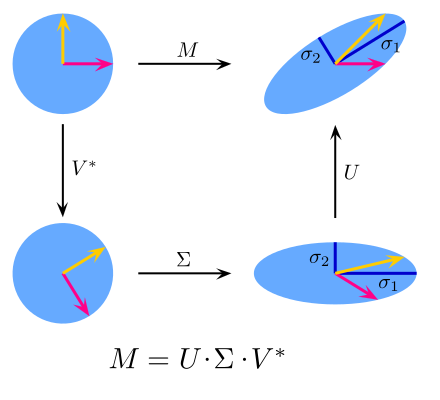

In [16]:
from IPython.display import Image
Image("Singular-Value-Decomposition.png")

Needless to say, the SVD is [implemented](https://numpy.org/doc/stable/reference/generated/numpy.linalg.svd.html) in `scipy.linalg` in the the `svd()` method:

In [12]:
m, n = 5, 4
A = np.random.randn(m, n) #+ 1.j*np.random.randn(m, n) # it also work with complex numbers
print("A:\n", A, '\n')

# perform the SVD
U, S, Vt = la.svd(A)

print("shapes: U =", U.shape, "D:", S.shape, "V^T:", Vt.shape, '\n')
print("Spectrum:\n", S, '\n')
print("U:\n", U, '\n')
print("V^T:\n", Vt, '\n')

A:
 [[-2.19324794 -0.74392813  2.64217772 -2.61525693]
 [ 0.16298089  0.3035679   0.89767845  1.64516018]
 [-0.31466521 -0.27214346  1.72031521  1.12171233]
 [ 0.17233722  0.45602918  0.13877161  0.00279033]
 [-0.56215874 -2.30037097 -0.4377786  -0.84954708]] 

shapes: U = (5, 5) D: (4,) V^T: (4, 4) 

Spectrum:
 [4.59232689 2.9868261  1.9871209  0.15850283] 

U:
 [[-0.93993905 -0.19662223 -0.22891802 -0.12381922  0.10059634]
 [ 0.16036498 -0.54632456  0.32623812 -0.4798293   0.58236165]
 [-0.09420359 -0.60884616  0.47525476  0.43566047 -0.45250956]
 [ 0.03462475 -0.08937729 -0.19253633  0.74655996  0.62959576]
 [-0.28412051  0.53309213  0.76041299  0.08532779  0.2226647 ]] 

V^T:
 [[ 0.49713063  0.31420632 -0.51660148  0.62230092]
 [ 0.0732209  -0.37529758 -0.77109321 -0.50912247]
 [-0.02765587 -0.85401831  0.07346896  0.51428609]
 [ 0.86413829 -0.1762919   0.3648842  -0.29840526]] 



In [13]:
# Let's verify the definition of SVD by hand
D = np.zeros((m, n))
for i in range(min(m, n)):
    D[i, i] = S[i]
print("D:\n", D, '\n')

SVD = np.dot(U, np.dot(D, Vt))
print("SVD:\n", SVD, '\n')
print("Are the SVD and A matrices equal?", np.allclose(SVD, A))

D:
 [[4.59232689 0.         0.         0.        ]
 [0.         2.9868261  0.         0.        ]
 [0.         0.         1.9871209  0.        ]
 [0.         0.         0.         0.15850283]
 [0.         0.         0.         0.        ]] 

SVD:
 [[-2.19324794 -0.74392813  2.64217772 -2.61525693]
 [ 0.16298089  0.3035679   0.89767845  1.64516018]
 [-0.31466521 -0.27214346  1.72031521  1.12171233]
 [ 0.17233722  0.45602918  0.13877161  0.00279033]
 [-0.56215874 -2.30037097 -0.4377786  -0.84954708]] 

Are the SVD and A matrices equal? True


## <mark>Principal Component Analysis</mark>

<mark>Principal Components Analysis (PCA) aims to find and rank all the eigenvalues and eigenvectors of the covariance matrix of a given dataset.</mark> This is useful because <mark>high-dimensional data (with $p$ features) may have nearly all their variation in a small number of dimensions $k < p$, i.e. in the subspace spanned by the eigenvectors of the covariance matrix that have the $k$ largest eigenvalues.</mark> If we <mark>project the original data into this subspace, we can have a dimension reduction (from $p$ to $k$) with hopefully little loss of information.</mark>

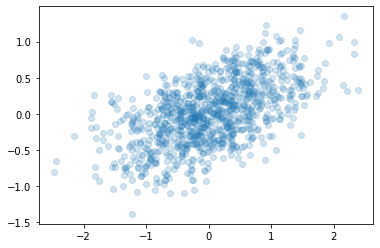

In [14]:
# construct a dataset with a skewed 2D distribution
mu = [0, 0] # centered on 0
sigma = [[0.6, 0.2], [0.2, 0.2]] # asymmetric sigmas
n = 1000
# generate random numbers according to a 2D normal distribution
X = np.random.multivariate_normal(mu, sigma, n).T

plt.scatter(X[0,:], X[1,:], alpha=0.2)

Numerically, PCA can be <mark>done either by means of **eigendecomposition on the covariance matrix** or via **SVD on the data matrix**.</mark> Even though the latter is usually preferred, let's have first a look at the former.


### PCA <mark>with eigendecomposition</mark>

Let's recall the definition of the <mark>covariance matrix (of 2 variables)</mark>:

$$
{\rm Cov}(X,Y)=\frac{\sum_{i=1}^n (X_i-\bar{X})(Y_i-\bar{Y})}{n-1}
$$

with Cov$(X,X)$ the variance of the variable $X$.

In the case the features of the datasets have all <mark>zero mean</mark>, the covariance matrix is of the form:

$$
{\rm Cov}(X)=\frac{XX^T}{n-1}
$$

In [15]:
# the covariance matrix
cov = np.cov(X)
#cov = np.dot(X, X.T)/(n-1) # this would yield the same result
print("Covariance matrix:\n", cov, '\n')

# now find the eigenvectors of the covariance matrix
l, V = la.eig(cov)
# take only the real component, if possible
l = np.real_if_close(l)

print("Eigenvalues:\n", l, '\n')
print("Eigenvectors:\n", V, '\n')

# Check that V is actually an orthogonal matrix (and thus its transpose is also its inverse) -> the product is the identity
print("VV^T:\n", V.dot(V.T), '\n')

Covariance matrix:
 [[0.59947858 0.19200715]
 [0.19200715 0.19285144]] 

Eigenvalues:
 [0.67581327 0.11651674] 

Eigenvectors:
 [[ 0.92925593 -0.36943661]
 [ 0.36943661  0.92925593]] 

VV^T:
 [[1.00000000e+00 1.37568236e-17]
 [1.37568236e-17 1.00000000e+00]] 



Eigenvalue: 0.6758132722108148 ,	eigenvector: [0.92925593 0.36943661]
Eigenvalue: 0.11651674016153243 ,	eigenvector: [-0.36943661  0.92925593]


Text(0.5, 1.0, 'Eigendecomposition:\neigenvectors of covariance matrix scaled by eigenvalue')

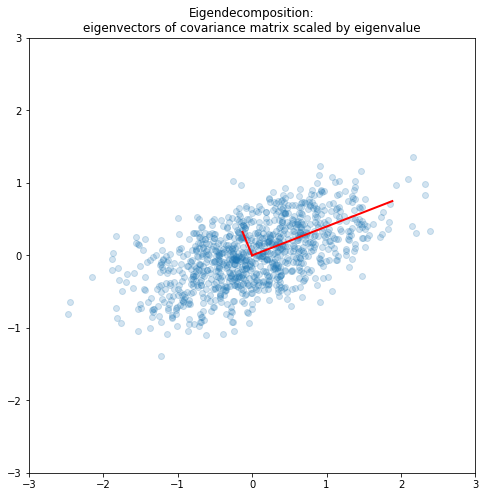

In [16]:
# Graphically represent the eigenvectors rescaled by the eigenvalues
plt.figure(figsize=(8, 8))
# the original data distribution
plt.scatter(X[0,:], X[1,:], alpha=0.2)

# a scale factor to graphically enhance the lines - only for visualization purposes
scale_factor = 3

# draw each eigenvectors rescaled by the eigenvalues
for li, vi in zip(l, V.T):
    print("Eigenvalue:", li, ",\teigenvector:", vi)
    # the line is defined by specifying its beginning and its end 
    plt.plot([0, scale_factor * li * vi[0]], [0, scale_factor * li * vi[1]], 'r-', lw=2)

# fix the size of the axes to have the right visual effect
plt.axis([-3, 3, -3, 3])
plt.title('Eigendecomposition:\neigenvectors of covariance matrix scaled by eigenvalue')

We can now <mark>use the eigenvectors and eigenvalues to rotate the data, i.e. take the eigenvectors as new basis vectors and redefine the data points w.r.t. this new basis.</mark>

(-3.0, 3.0, -3.0, 3.0)

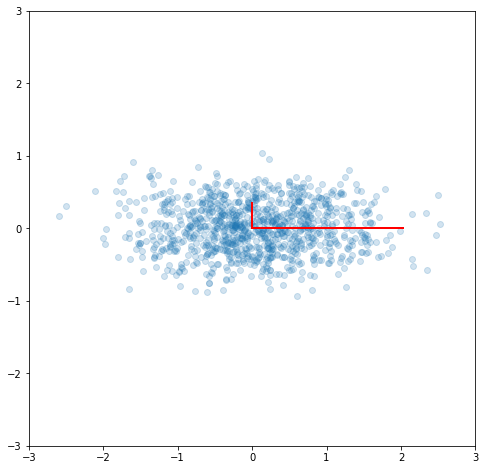

In [17]:
# rotate all the data points accordingly to the new base by multiplying by the transpose of matrix V
Xp = np.dot(V.T, X)

# then plot the rotated dataset and its "axes"
plt.figure(figsize=(8, 8))
plt.scatter(Xp[0,:], Xp[1,:], alpha=0.2)
# same eigenvalues as before, assume we rotated properly the data
for li, vi in zip(l, np.diag([1]*len(l))):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3, 3, -3, 3])

For example, <mark>if we only use the first column of `Xp`, we will have the projection of the data onto the first principal component, capturing the majority of the variance in the data using only a single feature that is a linear combination of the original features.</mark>

We <mark>may need to transform the (reduced) data set to the original feature coordinates for interpreation.</mark> This is simply another <mark>linear transform (matrix multiplication).</mark>

(-3.0, 3.0, -3.0, 3.0)

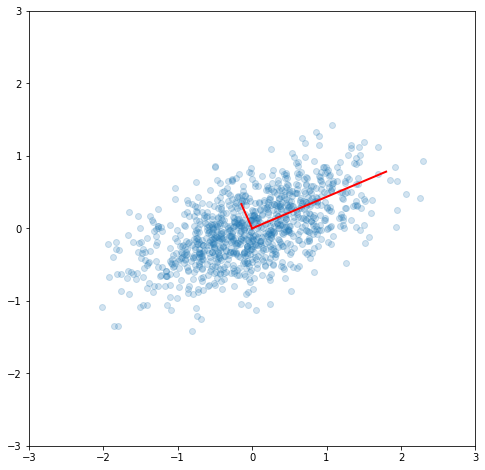

In [10]:
# rotate back the data to the original basis, this time by multiplying by the matrix V, the opposite as before
Xpp = np.dot(V, Xp)

# re-plot in the original basis
plt.figure(figsize=(8, 8))
plt.scatter(Xpp[0,:], Xpp[1,:], alpha=0.2)
for li, vi in zip(l, V.T):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3, 3, -3, 3])

#### Dimension reduction via PCA

Given the spectral decomposition:

$$ 
A=V\Lambda V^{-1}
$$

with $\Lambda$ of rank $p$. <mark>Reducing the dimensionality to $k<p$</mark> simply means <mark>setting to zero all but the first $k$ diagonal values (ordered from the largest to the smaller in module</mark>; that is the default in numpy/scipy).

In this way <mark>we catch the most relevant part of its variability (covariance).</mark>

Since the <mark>trace is invariant under change of basis, the total variability is also unchaged by PCA.</mark> By keeping only the first $k$ principal components, we can still retain $\sum_1^k \lambda_i/\sum_1^p \lambda_i$ of the total variability.

In general, the <mark>degree of dimension reduction is specified as keeping enough principal components so that a certain fraction (say 90%) of the total variability is retained.</mark>

In the previous example, let's consider only the component that exhibits the largest variability, and discard the other:

In [18]:
#l, V = np.linalg.eig(cov)
Lambda = np.diag(l)
print("Lambda:\n", Lambda, '\n')
print("Trace(A):\n", cov.trace(), '\n')
print("Trace(Lambda):\n", Lambda.trace(), '\n')

print("By selecting the component 0, we retain %.2f%% of the total variability" % (Lambda[0,0]/Lambda.trace()*100))

Lambda:
 [[0.67581327 0.        ]
 [0.         0.11651674]] 

Trace(A):
 0.7923300123723472 

Trace(Lambda):
 0.7923300123723472 

By selecting the component 0, we retain 85.29% of the total variability


### PCA <mark>with SVD</mark>

We saw that SVD is a decomposition of the data matrix $X=UDV^T$ where $U$ and $V$ are orthogonal matrices and $D$ is a diagnonal matrix.

Compared with the eigendecomposition of a matrix $A=W\Lambda W^{−1}$, we see that <mark>SVD gives us the eigendecomposition of the matrix $XX^T$, which as we have just seen, is basically a scaled version of the covariance for a data matrix with zero mean, with the eigenvectors given by $U$ and eigenvalues by $D^2$ (scaled by n−1).</mark>

(-3.0, 3.0, -3.0, 3.0)

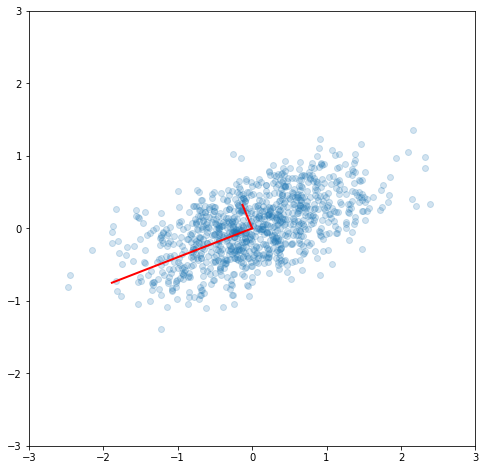

In [19]:
# Perform SVD decomposition on the dataset
U, S, Vt = np.linalg.svd(X)

# Rescale the SVD spectrum to get the eigenvalues
l_svd = S**2/(n-1)
# The matrix U already contains the eigenvectors
V_svd = U

plt.figure(figsize=(8, 8))
plt.scatter(X[0,:], X[1,:], alpha=0.2)
for li, vi in zip(l_svd, V_svd):
    plt.plot([0, scale_factor*li*vi[0]], [0, scale_factor*li*vi[1]], 'r-', lw=2)
plt.axis([-3, 3, -3, 3])

In [20]:
# Compare Eigenvalues
print("Eigendecomposition:\n", l)
print("SVD:\n", l_svd)

Eigendecomposition:
 [0.67581327 0.11651674]
SVD:
 [0.67644248 0.11659235]


In [21]:
# Compare Eigenvectors
print("Eigendecomposition:\n", V)
print("SVD:\n", V_svd)

Eigendecomposition:
 [[ 0.92925593 -0.36943661]
 [ 0.36943661  0.92925593]]
SVD:
 [[-0.92911186 -0.36979879]
 [-0.36979879  0.92911186]]


# Algorithmic Complexity

<mark>Profiling (e.g. with `timeit`) doesn’t tell us much about how an algorithm will perform on a different computer since it is determined by the hardware features.</mark> To <mark>compare performance in a device-indpendent fashion, a formalism (a.k.a the "Big-O") is used that characterizes functions in terms of their rates of growth as a function of the size *n* of the input.</mark>

An <mark>algorithm is compared to a given function $g(n)$ with a well defined scaling with *n*, e.g. $n^2$; if the ratio of the two is bounded, than that algorithm is ${\cal O}(g(n))$.</mark> Note that:
* only the <mark>largest terms in the scaling of $g(n)$ is kept in the notation</mark>
* two algorithms can have the <mark>same complexity and have very different performance</mark>; the same complexity <mark>only implies that the difference in performance is independent of *n*.</mark>

### Comparing bubble sort ${\cal O}(n^2)$ and merge sort ${\cal O}(n\log{n})$

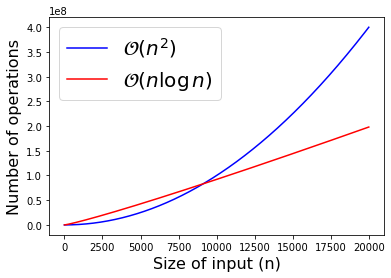

In [22]:
def f1(n, k):
    return k * n * n

def f2(n, k):
    return k * n * np.log(n)

n = np.arange(0.1, 20001)
plt.plot(n, f1(n, 1), c='blue')
plt.plot(n, f2(n, 1000), c='red')
plt.xlabel('Size of input (n)', fontsize=16)
plt.ylabel('Number of operations', fontsize=16)
plt.legend(['$\mathcal{O}(n^2)$', '$\mathcal{O}(n \log n)$'], loc='best', fontsize=20);

See [here](https://wiki.python.org/moin/TimeComplexity) for the complexity of operations on standard Python data structures. Note for instance that <mark>searching a list is much more expensive than searching a dictionary.</mark>

### Space Complexity

We can also use the <mark>${\cal O}$ notation in the same way to measure the space complexity of an algorithm.</mark>  The notion of space complexity becomes <mark>important when your data volume is of the same magnitude or larger than the memory you have available.</mark> In that case, an algorihtm with high space complexity <mark>may end up having to swap memory constantly, and will perform far worse than its time complexity would suggest.</mark>

Just as you should have a good idea of how your algorithm will scale with increasing *n*, you should also be able to know <mark>how much memory your data structures will require.</mark> For example, if you had an $n\times p$ matrix of integers, an $n\times p$ matrix of floats, and an $n\times p$ matrix of complex floats, how large can $n$ and $p$ be before you run out of RAM to store them?

In [23]:
# Notice how much overhead Python objects have:
# a raw integer should be 64 bits or 8 bytes only

import sys
print("int:", sys.getsizeof(1), "bytes") # bytes
print("long:", sys.getsizeof(1234567890123456789012345678901234567890), "bytes")
print("float:", sys.getsizeof(3.14), "bytes")
print("complex:", sys.getsizeof(3j), "bytes")
print("char:", sys.getsizeof('a'), "bytes")
print("string:", sys.getsizeof('hello world'), "bytes")

int: 28 bytes
long: 44 bytes
float: 24 bytes
complex: 32 bytes
char: 50 bytes
string: 60 bytes


In [24]:
print("100x100 bool:", np.ones((100, 100), dtype='bool').nbytes, "bytes")
print("100x100 int:", np.ones((100, 100), dtype='int').nbytes, "bytes") # default is 64 bits or 8 bytes
print("100x100 float:", np.ones((100, 100), dtype='float').nbytes, "bytes") # default is 64 bits or 8 bytes
print("100x100 complex:", np.ones((100, 100), dtype='complex').nbytes, "bytes")
print("10kx10k float:", np.ones((10000, 10000), dtype='float').nbytes / 1e9, "GB")

100x100 bool: 10000 bytes
100x100 int: 80000 bytes
100x100 float: 80000 bytes
100x100 complex: 160000 bytes
10kx10k float: 0.8 GB
